データサイエンスの練習

# データサイエンスの7ステップ


1.   目的・課題の特定
2.   データの取得・収集
3.   データ理解・データの可視化
4.   データの加工・前処理
5.   機械学習モデルの作成
6.   評価・テスト
7.   レポーティング



タイタニック

google driveのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ライブラリのインポート

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## ライブラリの説明

numpy

pandas

matplotlib

seaborn

データの読み込み

In [ ]:
dir_path = "/content/drive/MyDrive/DataSience/titanic/"
# 学習用データ
train_df = pd.read_csv(dir_path+"train.csv")
# テストデータの読み込み
test_df = pd.read_csv(dir_path+"test.csv")


In [ ]:
# 学習データの先頭5行を確認する
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# テストデータの先頭5行
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


目的：train_dfを利用してtest_dfのsurvivedを予測する

# データの特徴を確認する

学習データとテストデータを連結して確認をする

In [ ]:
#  学習データとテストデータを連結する
df = pd.concat([train_df,test_df],ignore_index=True)

In [ ]:
# dataの確認
df.shape

(1309, 12)

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


matplotlibを使用してグラフを作成する

In [ ]:
# 性別ごと
# groupby
# agg
df.groupby("Sex").agg({"Sex":"count"})

,Sex
Sex,
female,466
male,843


In [ ]:
tmp = df.groupby("Sex").agg({"Sex":"count"}).rename(columns={"Sex":"count_sex"})
tmp

,count_sex
Sex,
female,466
male,843


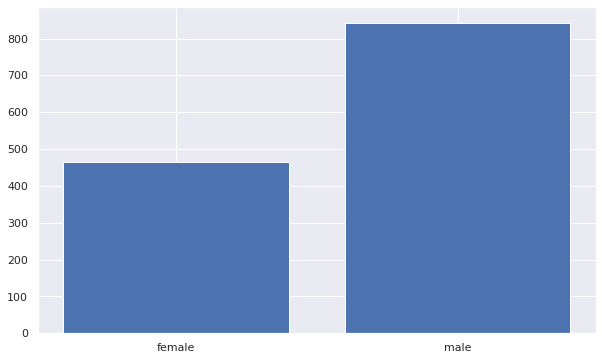

In [ ]:
# plt.barを使用してグラフ作成

# グラフの大きさを決める
plt.figure(figsize=(10,6))
# グラフで確認する
plt.bar(tmp.index,tmp.count_sex)
plt.show()

pandasでグラフを表示する

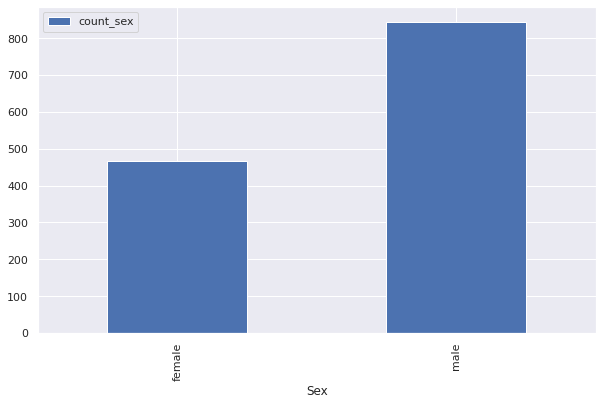

In [ ]:
# pandasで棒グラフを作成
tmp.plot(kind="bar",figsize=(10,6))


seabornで表示

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


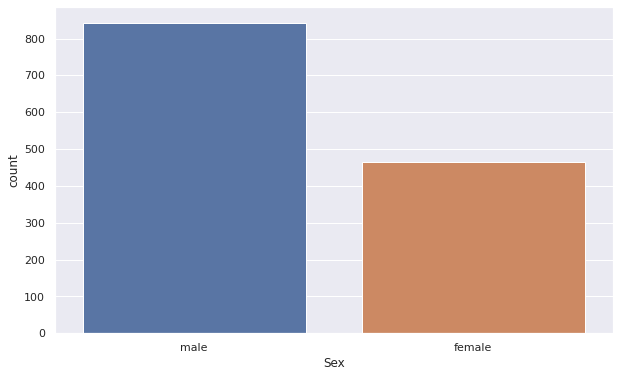

In [ ]:
# グラフの大きさを設定
plt.figure(figsize=(10,6))
sns.countplot("Sex",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


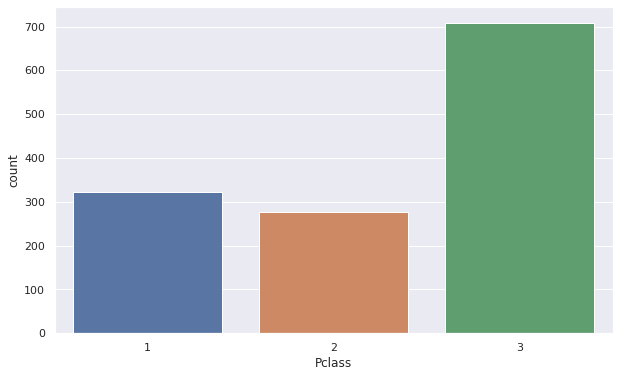

In [ ]:
# グラフの大きさを設定
plt.figure(figsize=(10,6))
sns.countplot("Pclass",data=df)

### 欠損値の確認

In [ ]:
# 欠損値を確認する
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## データの加工・前処理・特徴量エンジニアリング

欠損値の対処方法  
・補完  
・削除  

In [ ]:
# Embarkedの欠損値を確認
df.Embarked.isnull().sum()

2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


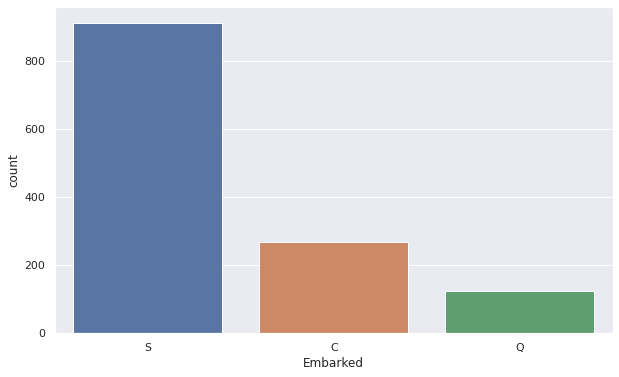

In [ ]:
# グラフ
plt.figure(figsize=(10,6))

# 乗船した港を確認する
sns.countplot("Embarked",data = df)
plt.show()

多くがSから乗船しているので、欠損値はSとする

In [ ]:
# 元データのコピー
df2 = df.copy()

# 欠損値の補完
df2.Embarked = df2.Embarked.fillna("S")

In [ ]:
# 欠損値の補完を確認する
df2.Embarked.isnull().sum()

0

In [ ]:
# 年齢の確認

# 最大値と最小値を確認
print(df2.Age.max())
print(df2.Age.min())

80.0
0.17


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


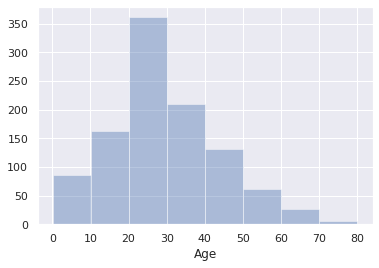

In [ ]:
# ヒストグラムの作成

# binsは分割数
sns.distplot(df.Age,bins=8,kde=False)


In [ ]:
# 年齢の平均値と中央値を確認する
print(df2.Age.mean())
print(df2.Age.median())

# 中央値で年齢を補完する

29.881137667304014
28.0


In [ ]:
# df2のコピー

df3 = df2.copy()

# 年齢の中央値を計算
age_median = df3.Age.median()
age_median



28.0

In [ ]:
# 年齢を中央値で補完する

df3.Age = df3.Age.fillna(age_median)

In [ ]:
# 欠損値の確認
df3.Age.isnull().sum()

0

カテゴリを数値化

変更方法  
ワンホットエンコーディング  
ラベルエンコーディング  

In [ ]:
df3.head()

# 使わないカラムを削除する
df4 = df3.drop(columns=["Name","SibSp","Parch","Ticket","Fare","Cabin"])

# 確認
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0.0,3,male,22.0,S
1,2,1.0,1,female,38.0,C
2,3,1.0,3,female,26.0,S
3,4,1.0,1,female,35.0,S
4,5,0.0,3,male,35.0,S


In [ ]:
# ワンホットエンコーディングをしてみる
pd.get_dummies(df4["Embarked"])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


In [ ]:
# ワンホットの結果を格納する
tmp_embarked = pd.get_dummies(df4["Embarked"],prefix="Embarked")
tmp_embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


In [ ]:
# データフレームにワンホットエンコーディングの結果を結合させる
df5 = pd.concat([df4,tmp_embarked],axis=1).drop(columns=["Embarked"])
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,0,0,1
1,2,1.0,1,female,38.0,1,0,0
2,3,1.0,3,female,26.0,0,0,1
3,4,1.0,1,female,35.0,0,0,1
4,5,0.0,3,male,35.0,0,0,1


性別はラベルエンコーディングを使用する

In [ ]:
# ワンホットエンコーディング
pd.get_dummies(df5["Sex"]).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
# ラベルエンコーディングする
df5["Sex"] = pd.get_dummies(df5["Sex"],drop_first=True)

In [ ]:
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,0,0,1
1,2,1.0,1,0,38.0,1,0,0
2,3,1.0,3,0,26.0,0,0,1
3,4,1.0,1,0,35.0,0,0,1
4,5,0.0,3,1,35.0,0,0,1


ここまでで前処理が完了

## 学習用データとテストデータに分割する

In [ ]:
# 学習データに分類した結果を変数trainに格納する
train = df5[~df5.Survived.isnull()]

# テストデータに分類した結果を変数testに格納する
test = df5[df5.Survived.isnull()]

test.head()


,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,NaN,3,1,34.5,0,1,0
892,893,NaN,3,0,47.0,0,0,1
893,894,NaN,2,1,62.0,0,1,0
894,895,NaN,3,1,27.0,0,0,1
895,896,NaN,3,0,22.0,0,0,1


In [ ]:
# Survivedの削除
test = test.drop(columns = ["Survived"])
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,3,1,34.5,0,1,0
892,893,3,0,47.0,0,0,1
893,894,2,1,62.0,0,1,0
894,895,3,1,27.0,0,0,1
895,896,3,0,22.0,0,0,1


In [ ]:
# 正解をy_trainに格納
y_train = train.Survived

# 特徴量をx_trainに格納する
X_train = train.drop(columns=["Survived"])

In [ ]:
# 特徴量を確認する
X_train.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,0,0,1
1,2,1,0,38.0,1,0,0
2,3,3,0,26.0,0,0,1
3,4,1,0,35.0,0,0,1
4,5,3,1,35.0,0,0,1


In [ ]:
# 正解を確認する
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

## 機械学習を使用して予測を行う

In [ ]:
# ライブラリのインポート
from sklearn import tree

分類：ラベルを予測する  

回帰：数値を予測する  

In [ ]:
# 決定木モデル
model = tree.DecisionTreeClassifier()

In [ ]:
# 決定木のモデルを作成
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# 作成したモデルを使った予測を行う
y_pred = model.predict(test)

In [ ]:
# 予測結果を確認する
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
# データの大きさを確認する
len(test),len(y_pred)

(418, 418)

In [ ]:
# 予測結果を反映する
test["Survived"] = y_pred

In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,Survivied,Survived
891,892,3,1,34.5,0,1,0,0.0,0.0
892,893,3,0,47.0,0,0,1,0.0,0.0
893,894,2,1,62.0,0,1,0,0.0,0.0
894,895,3,1,27.0,0,0,1,1.0,1.0
895,896,3,0,22.0,0,0,1,0.0,0.0


予測結果を確認する

In [ ]:
# 提出用のデータマートを作成する
pred_df = test[["PassengerId","Survived"]].set_index("PassengerId")

In [ ]:
# 予測結果を整数に変換する
pred_df.Survived = pred_df.Survived.astype(int)
pred_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0


In [ ]:
# csvの作成
pred_df.to_csv("submission_v1.csv",index_label=["PassengerId"])